In [3]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

preprocess_penguins_df = palmerpenguins.load_penguins()

Colecta y validacion de datos

Que tipo de datos on las variables del conjunto de datos? 

In [4]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

Cuantas variables de cada tipo de dato tenemos en el conjunto de datos? 

In [5]:
preprocess_penguins_df.dtypes.value_counts()

float64    4
object     3
int64      1
Name: count, dtype: int64

Cuantas variables y observaciones tenemos en el conjunto de datos?

In [7]:
preprocess_penguins_df.shape

(344, 8)

Existen valores nulos explicitos en el conjunto de datos?

In [9]:
preprocess_penguins_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Cuantos valores nulos tenemos en total en el conjunto de datos?

In [11]:
(
  preprocess_penguins_df
  .isnull()
  .sum()
  .sum()
)

np.int64(19)

Cual es la proporcion de valores nulos por cada variable?

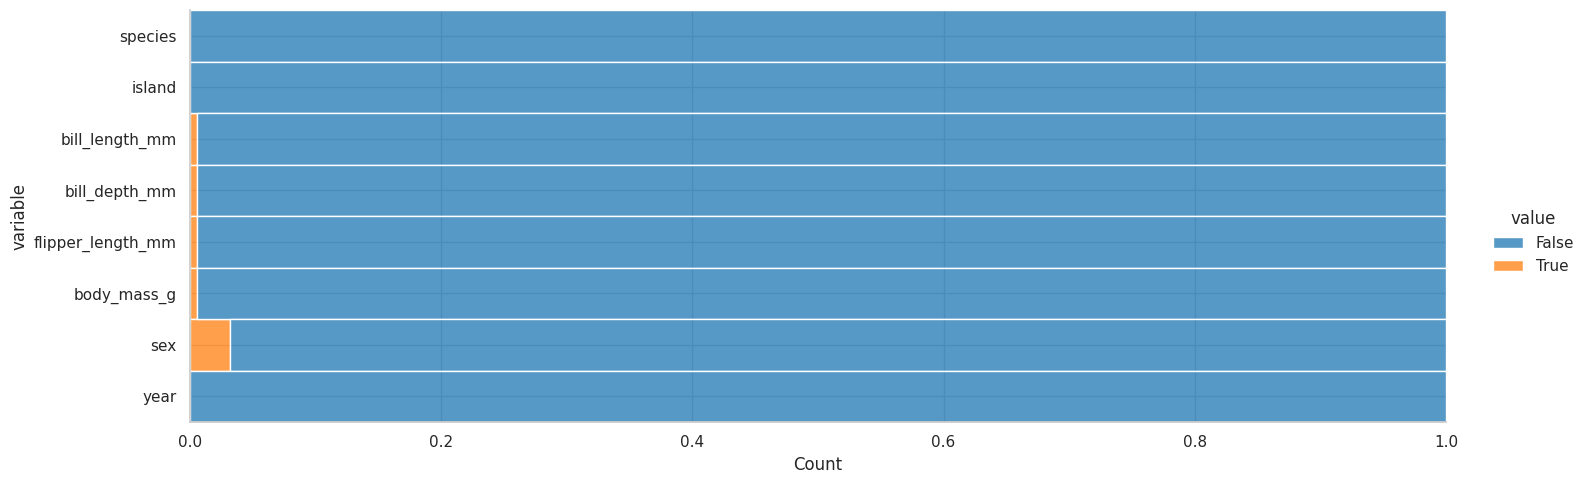

In [17]:
(
  preprocess_penguins_df
  .isnull()
  .melt()
  .pipe(
    lambda df: (
      sns.displot(
        data=df,
        y='variable', 
        hue='value',
        multiple='fill',
        aspect=3
      )
    )
  )
)

Como podemos visualizar los valores nulos en todo el conjunto de datos?

<Axes: >

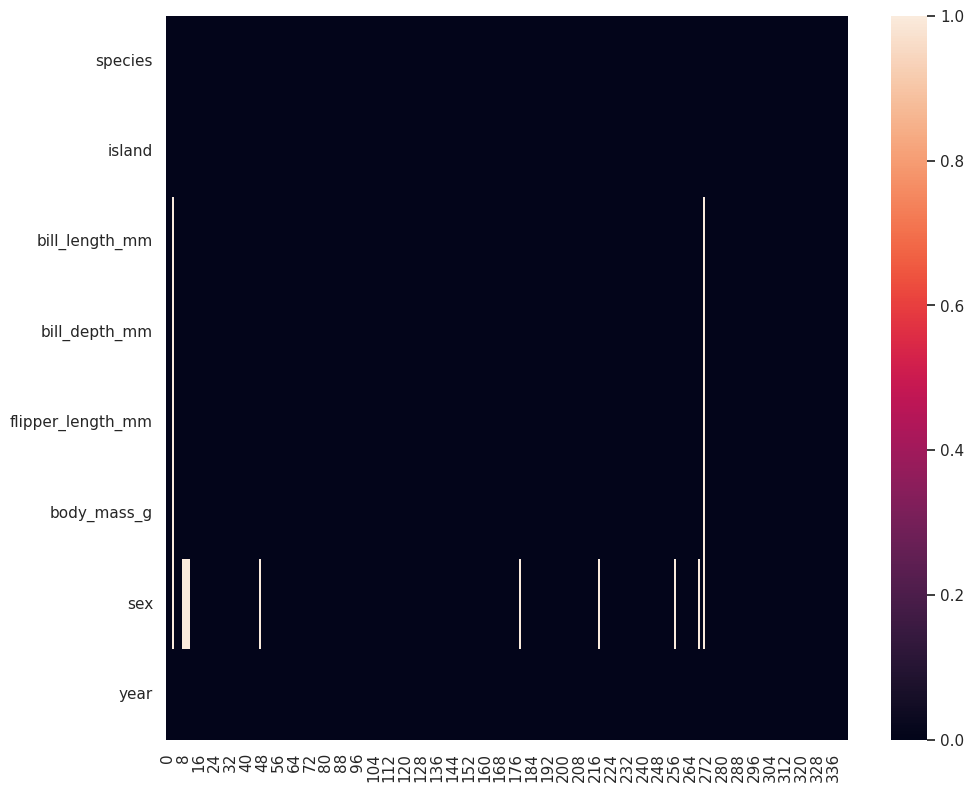

In [18]:
(
  preprocess_penguins_df
  .isnull()
  .transpose()
  .pipe(
    lambda df: (
      sns.heatmap(
        data=df
      )
    )
  )
)

Cuantas observaciones perdemos si eliminamos los datos faltantes? 

In [19]:
preprocess_penguins_df.shape

(344, 8)

In [20]:
processed_penguins_df = (
  preprocess_penguins_df
  .dropna()
)

processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
